# Laboratorio No. 5

### Grupo:
- Cristian Aguirre: 20231
- Paola de Leon: 20361
- Diego Cordova: 20212

## Task 1 - Clasificacion de sitios de Phishing

**Importar Dataset**

In [162]:
# Imports
from sklearn.model_selection import train_test_split
import zipfile as zf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import csv 

In [163]:
data = pd.read_csv('./dataset_phishing.csv')
print(data.shape)
data.head()

(11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


**Exploracion de Datos**

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [165]:
data['status'] = data['status'].replace({'legitimate': 0, 'phishing': 1})

In [166]:
corr_matrix = data.corr()
corr_matrix

C:\Users\cordo\AppData\Local\Temp\ipykernel_15564\184011309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


**Luego de hacer un analisis de correlación entre las variables, se seleccionan las 30 variables con un mayor valor de correlación para poderlas utilizar en nuestro modelo**

In [167]:

# Seleccionar las 5 variables con las correlaciones más altas en orden descendente
top_corr_vars = pd.DataFrame(corr_matrix['status'].nlargest(30))
top_corr_vars



,status
status,1.000000
google_index,0.731171
ratio_digits_url,0.356395
domain_in_title,0.342807
phish_hints,0.335393
ip,0.321698
nb_qm,0.294319
length_url,0.248580
nb_slash,0.242270
length_hostname,0.238322


**De nuestro dataset original, seleccionamos unicamente las 30 variables que identificamos de mayor importancia en el paso anterior y descartamos el resto.**

In [168]:
columns = top_corr_vars.index.tolist()
data = data.loc[:, columns]
data

,status,google_index,ratio_digits_url,domain_in_title,phish_hints,ip,nb_qm,length_url,nb_slash,length_hostname,...,avg_word_host,length_words_raw,nb_and,avg_words_raw,nb_com,statistical_report,nb_at,abnormal_subdomain,longest_word_host,dns_record
0,0,1,0.000000,0,0,0,0,37,3,19,...,7.00,4,0,5.750000,0,0,0,0,11,1
1,1,1,0.220779,1,0,1,0,77,5,23,...,19.00,4,0,15.750000,0,0,0,0,19,0
2,1,1,0.150794,1,0,1,1,126,5,50,...,8.40,12,2,8.250000,1,0,0,0,13,0
3,0,0,0.000000,1,0,0,0,18,2,11,...,5.00,1,0,5.000000,0,0,0,0,5,0
4,0,0,0.000000,0,0,0,0,55,5,15,...,5.00,6,0,6.333333,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,0,0.000000,0,0,0,0,45,4,17,...,6.00,4,0,7.750000,0,0,0,0,9,0
11426,1,1,0.023810,1,0,0,1,84,5,18,...,6.50,12,0,5.166667,1,0,1,0,10,0
11427,0,1,0.142857,0,0,1,1,105,5,16,...,5.50,13,0,6.153846,0,0,0,0,8,0
11428,0,0,0.000000,1,0,0,0,38,3,30,...,12.50,2,0,12.500000,0,0,0,0,22,0


**Finalmente para asegurarno, podemos verificar si hay algun dato nulo en nuestro nuevo dataset.**

In [169]:
columnas_con_nulos = data.isnull().sum()
null_len = len(columnas_con_nulos[columnas_con_nulos > 0])
print('Se encontraron {} datos nulos en el dataset.'.format(null_len))

Se encontraron 0 datos nulos en el dataset.


**Balance de clases**

In [170]:
class_distribution = pd.value_counts(data['status'], normalize=True)

print("Distribución de clases:\n", class_distribution)

Distribución de clases:
 0    0.5
1    0.5
Name: status, dtype: float64


Como podemos ver la distribucion de clases es 50% para cada una, por lo cual la data está balanceada.

<h2>Normalización<h2>

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


In [171]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


In [172]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X = normalizador.fit_transform(X)
X

array([[ 0.93426411, -0.59465091, -1.8604726 , ..., -0.14861728,
         0.10787565,  6.97822701],
       [ 0.93426411,  1.87605348,  0.53749784, ..., -0.14861728,
         1.7300018 , -0.14330288],
       [ 0.93426411,  1.09285634,  0.53749784, ..., -0.14861728,
         0.51340719, -0.14330288],
       ...,
       [ 0.93426411,  1.00404016, -1.8604726 , ..., -0.14861728,
        -0.50042166, -0.14330288],
       [-1.07036115, -0.59465091,  0.53749784, ..., -0.14861728,
         2.33829911, -0.14330288],
       [ 0.93426411,  0.36724497,  0.53749784, ...,  6.72869257,
        -1.51425051,  6.97822701]])

In [173]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Task 1.1 - K-Nearest Neighbors

## Task 1.2 - Support Vector Machines

En este caso se usará la métrica *F1 Score* como métrica de rendimiento. Esto debido a que toma en cuenta el tamaño de la muestra.

d:\Archivos de programa\Python\3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Archivos de programa\Python\3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Archivos de programa\Python\3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cordo\AppData

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1690
           1       0.51      1.00      0.67      1739

    accuracy                           0.51      3429
   macro avg       0.25      0.50      0.34      3429
weighted avg       0.26      0.51      0.34      3429

[[   0 1690]
 [   0 1739]]
0.5071449402158064


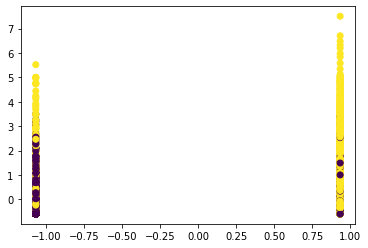

In [174]:
import matplotlib.pyplot as plt

# Hyperparametros
lr = 1
C = 1
n_epochs = 100

# Pesos iniciales
w = np.zeros(X.shape[1])
b = 0

def hinge_loss(X, y, w, b):
    distances = y * (np.dot(X, w) + b)
    return np.maximum(0, 1 - distances)

# Entreno del modelo
for epoch in range(n_epochs):
    for i, x in enumerate(X):
        loss = hinge_loss(x, y[i], w, b)
        if loss == 0:
            gradient_w = w
            gradient_b = 0
        else:
            gradient_w = w - C * y[i] * x
            gradient_b = -C * y[i]

        w -= lr * gradient_w
        b -= lr * gradient_b

# Prueba con el modelo
y_pred = []

for test in X_prueba:
    prediction = np.sign(np.dot(test, w) + b)
    y_pred.append(prediction)

# Metrica de rendimiento
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_prueba, y_pred))
print(confusion_matrix(y_prueba, y_pred))
print(accuracy_score(y_prueba, y_pred))

# Grafico de la prueba
plt.scatter(X[:, 0], X[:, 1], c=y)
x_vals = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_vals = - (w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals)
plt.show()


In [175]:
from sklearn.svm import SVC
clasificador = SVC(kernel = 'linear', random_state = 0, class_weight='balanced')
svc = clasificador.fit(X_entreno, y_entreno)

y_pred = clasificador.predict(X_prueba)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_prueba, y_pred))
print(confusion_matrix(y_prueba, y_pred))
accuracy_score(y_prueba, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1690
           1       0.91      0.91      0.91      1739

    accuracy                           0.91      3429
   macro avg       0.91      0.91      0.91      3429
weighted avg       0.91      0.91      0.91      3429

[[1532  158]
 [ 152 1587]]


0.9095946340040828

En azul se pueden ver los valores predichos en rojo los valores usados para pruebas


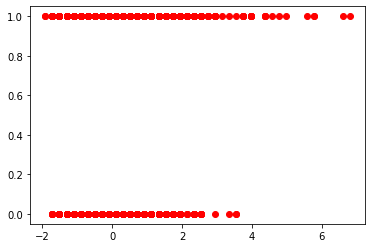

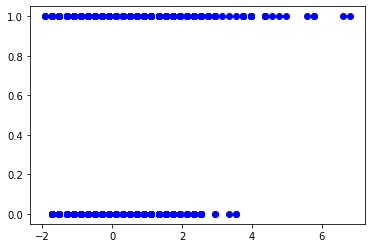

In [176]:
xx = []

for n in X_prueba:
  xx.append(n[-2])

print('En azul se pueden ver los valores predichos en rojo los valores usados para pruebas')
plt.plot(xx, y_prueba, 'ro')
plt.show()
plt.plot(xx, y_pred, 'bo')
plt.show()

Como se puede ver en las metricas de desempeño y en las gráficas. El modelo con mejor desempeño es el que provee sklearn.
Esto porque dicho modelo ajusta de mejor manera los pesos para lograr mejores predicciones.